<a href="https://colab.research.google.com/github/yogi2034/Deep-Learning/blob/main/003_pytorch_computerVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [170]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.6.0+cu124
0.21.0+cu124


In [171]:
from torchvision import datasets
train_data =datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)
test_data =datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [172]:
len(train_data),len(test_data)

(60000, 10000)

In [173]:
image,label=train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [174]:
class_names=train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [175]:
class_to_idx=train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [176]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [177]:
image.shape,label

(torch.Size([1, 28, 28]), 9)

In [178]:
print(f"Image shape:{image.shape}->[color_channels,height,weight]")
print(f"Image label:{class_names[label]}")

Image shape:torch.Size([1, 28, 28])->[color_channels,height,weight]
Image label:Ankle boot


Image shape;torch.Size([1, 28, 28])


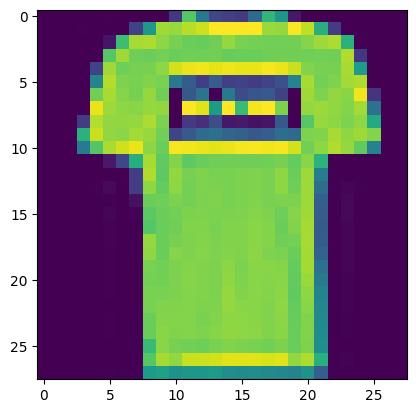

In [179]:
import matplotlib.pyplot as plt
image,label=train_data[1]
print(f"Image shape;{image.shape}")
plt.imshow(image.squeeze());
# image

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

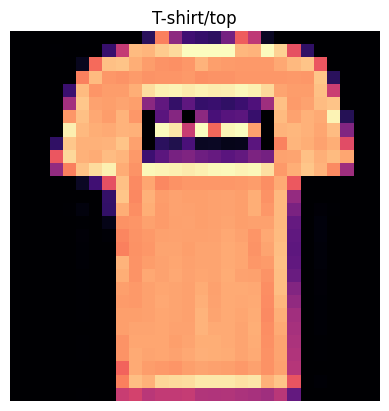

In [180]:
plt.imshow(image.squeeze(),cmap="magma")
plt.title(class_names[label]);
plt.axis(False)

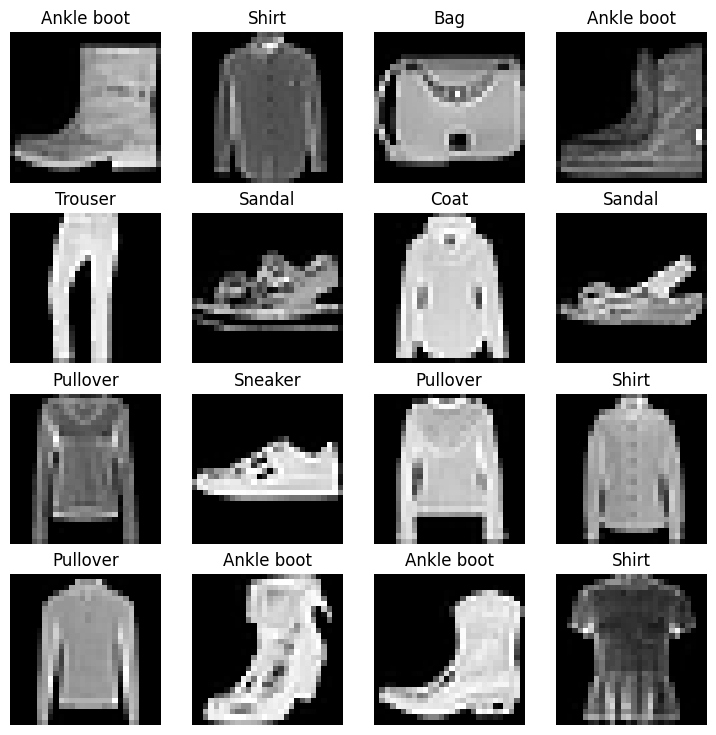

In [181]:
torch.manual_seed(42)
fig=plt.figure(figsize=(9,9))
rows,cols=4,4
for i in range(1,rows*cols+1):
  random_idx=torch.randint(0,len(train_data),size=[1]).item()
  # print(random_idx)
  img,label=train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(),cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

In [182]:
train_data,test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

Prepare DataLoader

In [183]:
from torch.utils.data import DataLoader

BATCH_SIZE=32
train_dataloader=DataLoader(dataset=train_data,batch_size=BATCH_SIZE,
                            shuffle=True)

test_dataloader=DataLoader(dataset=test_data,batch_size=BATCH_SIZE,
                            shuffle=False)
train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7bfcaee9b550>,
 <torch.utils.data.dataloader.DataLoader at 0x7bfcaeea3890>)

In [184]:
print(f"{train_dataloader,test_dataloader}")
print(f"Length of train_dataloader:{len(train_dataloader)} batches of {BATCH_SIZE}")


(<torch.utils.data.dataloader.DataLoader object at 0x7bfcaee9b550>, <torch.utils.data.dataloader.DataLoader object at 0x7bfcaeea3890>)
Length of train_dataloader:1875 batches of 32


In [185]:
train_features_batch,train_labels_batch=next(iter(train_dataloader))

Image size:torch.Size([1, 28, 28])
Label:6,label size:torch.Size([])


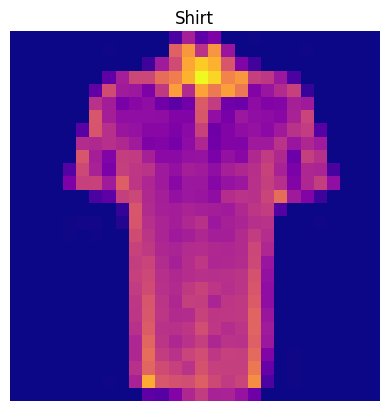

In [186]:
torch.manual_seed(42)
random_idx=torch.randint(0,len(train_features_batch),size=[1]).item()
img,label=train_features_batch[random_idx],train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap="plasma")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size:{img.shape}")
print(f"Label:{label},label size:{label.shape}")

BaseLine Model

In [187]:
flatten_model=nn.Flatten()
x=train_features_batch[0]
output=flatten_model(x)
print(f"shape before{x.shape}")
print(f"shape after{output.shape}")


shape beforetorch.Size([1, 28, 28])
shape aftertorch.Size([1, 784])


In [188]:
# output.squeeze()

In [189]:
from torch import nn
class Model0(nn.Module):
  def __init__(self,
              input_shape:int,
              hidden_units:int,
              output_shape:int):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )
  def forward(self,x):
    return self.layer_stack(x)

In [190]:
torch.manual_seed(42)


model_0=Model0(
    input_shape=784,
    hidden_units=10,
    output_shape=len(class_names)
).to("cpu")
model_0

Model0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [191]:
dummy_x=torch.rand(1,1,28,28)
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [192]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

In [193]:
import requests
from pathlib import Path
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists,skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

helper_functions.py already exists,skipping download


In [194]:
from helper_functions import accuracy_fn
loss_fn =nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.1)

In [195]:
from timeit import default_timer as timer
def print_train_time(start:float,
                     end:float,
                     device:torch.device=None):
  total_time =end-start
  print(f"Train time on {device}:{total_time:.3f} seconds")
  return total_time

In [196]:
start_time =timer()
end_time=timer()
print_train_time(start=start_time,end=end_time,device="cpu")

Train time on cpu:0.000 seconds


3.698499995152815e-05

Train and Test loop

In [197]:
from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_on_cpu=timer()

epochs=3

for epoch in tqdm(range(epochs)):
  print(f"Epoch:{epoch}\n------------------------")
  train_loss=0
  for batch,(X,y) in enumerate(train_dataloader):
      model_0.train()
      y_pred=model_0(X)
      loss=loss_fn(y_pred,y)
      train_loss+=loss
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      if batch %400 ==0:
         print(f"Looked at {batch*len(X)}/{len(train_dataloader.dataset)} samples")
  train_loss/=len(train_dataloader)

  test_loss,test_acc=0,0
  model_0.eval()
  with torch.inference_mode():
      for X,y in test_dataloader:
        test_pred=model_0(X)
        test_loss+=loss_fn(test_pred,y)
        test_acc+=accuracy_fn(y_true=y,y_pred=test_pred.argmax(dim=1))
      test_loss/=len(test_dataloader)
      test_acc/=len(test_dataloader)
  print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")
train_time_end_on_cpu=timer()
total_train_time_model_0=print_train_time(start=train_time_start_on_cpu,
                                          end=train_time_end_on_cpu,
                                          device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0
------------------------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.59039 | Test loss: 0.50954, Test acc: 82.04%

Epoch:1
------------------------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.47633 | Test loss: 0.47989, Test acc: 83.20%

Epoch:2
------------------------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.45503 | Test loss: 0.47664, Test acc: 83.43%

Train time on cpu:27.875 seconds


In [198]:
str(next(model_0.parameters()).device)

'cpu'

Make predictions

In [199]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn):
  loss,acc=0,0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader) :
      y_pred=model(X)

      loss+=loss_fn(y_pred,y)
      acc+=accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))
    loss/=len(data_loader)
    acc/=len(data_loader)
  return {"model_name":model.__class__.__name__,
          "model_loss":loss.item(),
          "model_acc":acc}
model_0_results=eval_model(model=model_0,
                           data_loader=test_dataloader,
                           loss_fn=loss_fn,
                           accuracy_fn=accuracy_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'Model0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

In [200]:
!nvidia-smi

Wed May 14 08:07:03 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   78C    P0             34W /   70W |     166MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [201]:
torch.cuda.is_available()

True

In [202]:
import torch
device ="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

Model 1

In [203]:
class Model1(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output_shape),
        nn.ReLU()
    )
  def forward(self,x:torch.Tensor):
    return self.layer_stack(x)

In [204]:
next(model_0.parameters()).device

device(type='cpu')

In [205]:
device

'cuda'

In [206]:
torch.manual_seed(42)
model_1=Model1(input_shape=784,
               hidden_units=10,
               output_shape=len(class_names)).to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [207]:
from helper_functions import accuracy_fn
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_1.parameters(),lr=0.1)

Model 1 train and test loops

In [208]:
def train_step(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               accuracy_fn,
               device:torch.device=device):
  train_loss,train_acc=0,0
  for batch,(X,y ) in enumerate(data_loader):
    X, y = X.to(device), y.to(device)
    model.train()
    y_pred=model(X)
    loss=loss_fn(y_pred,y)

    train_loss+=loss
    train_acc+=accuracy_fn(y_true=y,
                           y_pred=y_pred.argmax(dim=1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch%400==0:
      print(f"Looked at {batch*len(X)}/{len(train_dataloader.dataset)} samples")
  train_loss/=len(data_loader)
  train_acc/=len(data_loader)
  print(f"Train Loss:{train_loss}||Train acc:{train_acc}")
def test_step(model:torch.nn.Module,
              data_loader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              # optimizer:torch.optim.Optimizer,
              accuracy_fn,device:torch.device=device):
  test_loss,test_acc=0,0
  model.eval()
  with torch.inference_mode():
    for X,y in data_loader:
      X,y=X.to(device),y.to(device)
      test_pred=model(X)
      test_loss+=loss_fn(test_pred,y)
      test_acc+=accuracy_fn(y_true=y,y_pred=test_pred.argmax(dim=1))
    test_loss/=len(data_loader)
    test_acc/=len(data_loader)
    print(f"Test Loss:{test_loss}||Test acc:{test_acc}")

In [209]:
model_1.to(device)


Model1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [210]:
torch.manual_seed(42)
from timeit import default_timer as timer
train_time_start_on_gpu=timer()
epochs=3
for epoch in tqdm(range(epochs)):
  print(f"Epoch:{epoch}")
  train_step(model=model_1,
              data_loader=train_dataloader,
              loss_fn=loss_fn,
              optimizer=optimizer,
              accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)
train_time_end_on_gpu=timer()
total_train_time_model_1=print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train Loss:1.0919920206069946||Train acc:61.343333333333334
Test Loss:0.9563649296760559||Test acc:64.99600638977635
Epoch:1
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train Loss:0.7810057401657104||Train acc:71.92833333333333
Test Loss:0.7222670912742615||Test acc:73.91174121405751
Epoch:2
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train Loss:0.6702709197998047||Train acc:75.93666666666667
Test Loss:0.6850008964538574||Test acc:75.01996805111821
Train time on cuda:29.272 seconds


In [211]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn,
               device:torch.device=device):
  loss,acc=0,0
  model.eval()
  with torch.inference_mode():
    for X,y in data_loader:
      X,y =X.to(device),y.to(device)
      y_pred=model(X)
      loss+=loss_fn(y_pred,y)
      acc+=accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))

    loss/=len(data_loader)
    acc/=len(data_loader)
    return {"model_name":model.__class__.__name__,
              "model_loss":loss.item(),
              "model_acc":acc}

In [212]:
model_0_results

{'model_name': 'Model0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

In [213]:
total_train_time_model_0

27.87471649600002

In [214]:
model_1_results=eval_model(model=model_1,
                           data_loader=test_dataloader,
                           loss_fn=loss_fn,
                           accuracy_fn=accuracy_fn)

In [215]:
model_1_results

{'model_name': 'Model1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

## **Convolutional** **Neural** **Network**

In [216]:
class Model2(nn.Module):
  def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
    super().__init__()
    self.conv_block_1=nn.Sequential(
        nn.Conv2d(
        in_channels=input_shape,
        out_channels=hidden_units,
        kernel_size=3,
        stride=1,
        padding=1),

    nn.ReLU(),
    nn.Conv2d(in_channels=hidden_units,
              out_channels=hidden_units,
              kernel_size=3,
              stride=1,
              padding=1),
              nn.ReLU(),
              nn.MaxPool2d(kernel_size=2,stride=2)

    )

    self.conv_block_2=nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )
    self.classifier=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape,)
    )
  def forward(self,x:torch.Tensor):
      x=self.conv_block_1(x)
      # print(x.shape)
      x=self.conv_block_2(x)
      # print(x.shape)
      x=self.classifier(x)
      return x

In [217]:
image.shape

torch.Size([1, 28, 28])

In [218]:
torch.manual_seed(42)
model_2=Model2(input_shape=1,
               hidden_units=10,
               output_shape=len(class_names)).to(device)

In [219]:
torch.manual_seed(42)

images=torch.randn(size=(32,3,64,64))
test_image=images[0]
print(f"Image batch shape:{images.shape}")
print(f"Single image:{test_image.shape}")
print(f"Test image:{test_image}")


Image batch shape:torch.Size([32, 3, 64, 64])
Single image:torch.Size([3, 64, 64])
Test image:tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.7978,  1.

In [220]:
conv_layer=nn.Conv2d(in_channels=3,
                     out_channels=10,
                     kernel_size=(3,3),
                                  stride=1,
                                  padding=0)
conv_output=conv_layer(test_image)
conv_output.shape

torch.Size([10, 62, 62])

In [221]:
conv_layer(test_image)

tensor([[[-2.8778e-01, -6.0596e-02, -5.6306e-02,  ...,  2.8654e-01,
           6.6224e-01, -2.3216e-01],
         [-9.8911e-01, -4.0099e-01,  4.1832e-01,  ...,  4.7459e-01,
          -1.8552e-01, -5.7622e-01],
         [-4.1340e-02, -2.3277e-01,  3.7418e-01,  ...,  2.8255e-02,
           1.4923e-01,  1.4236e-01],
         ...,
         [-8.0374e-01, -7.6687e-01, -5.9457e-02,  ...,  1.7452e-01,
           4.2594e-01, -4.8341e-01],
         [-1.4512e-01, -1.1566e-01,  6.1783e-01,  ...,  2.4126e-01,
          -3.6626e-01,  3.5645e-01],
         [ 3.6096e-02,  1.5214e-01,  2.3123e-01,  ...,  3.0904e-01,
          -4.9680e-01, -7.2258e-01]],

        [[-1.0853e+00, -1.6079e+00,  1.3346e-01,  ...,  2.1698e-01,
          -1.7643e+00,  2.5263e-01],
         [-8.2507e-01,  6.3866e-01,  1.8845e-01,  ..., -1.0936e-01,
           4.8068e-01,  8.4869e-01],
         [ 6.4927e-01, -4.2061e-03, -4.9991e-01,  ...,  5.8356e-01,
           2.4611e-01,  6.6233e-01],
         ...,
         [ 9.8860e-02,  1

In [222]:
torch.manual_seed(42)
conv_layer_2=nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=(5,5),
                       stride=2,
                       padding=0)
conv_layer_2(test_image.unsqueeze(0)).shape

torch.Size([1, 10, 30, 30])

In [223]:
print(f"Test image original shape:{test_image.shape}")
print(f"Test image with unsqueezed dim:{test_image.unsqueeze(0).shape}")

max_pool_layer=nn.MaxPool2d(kernel_size=2)

test_image_through_conv=conv_layer(test_image)
print(f"after conv :{test_image_through_conv.shape}")
test_image_through_conv_and_max_pool=max_pool_layer(test_image_through_conv)
print(f"after conv and max pool:{test_image_through_conv_and_max_pool.shape}")

Test image original shape:torch.Size([3, 64, 64])
Test image with unsqueezed dim:torch.Size([1, 3, 64, 64])
after conv :torch.Size([10, 62, 62])
after conv and max pool:torch.Size([10, 31, 31])


In [224]:
torch.manual_seed(42)
random_tensor=torch.randn(size=(1,1,2,2))
print(f"\n Random Tensor\n:{random_tensor}")
max_pool_layer=nn.MaxPool2d(kernel_size=2)
max_pool_tensor=max_pool_layer(random_tensor)
print(f"\n max pool tensor:\n {max_pool_tensor}")
print(f"Max pool tensor shape:{max_pool_tensor.shape}")
random_tensor



 Random Tensor
:tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])

 max pool tensor:
 tensor([[[[0.3367]]]])
Max pool tensor shape:torch.Size([1, 1, 1, 1])


tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])

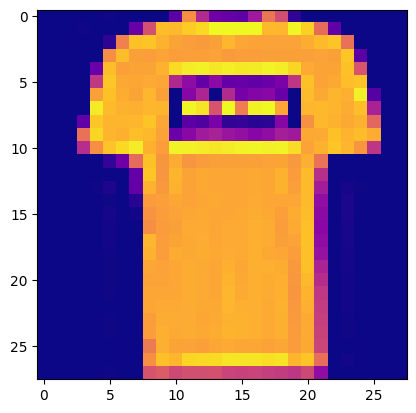

In [225]:
plt.imshow(image.squeeze(),cmap="plasma")

In [226]:
model_2.to(device)

Model2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [227]:
rand_image_tensor=torch.randn(1,28,28)


Loss function for CNN

In [228]:
from helper_functions import accuracy_fn

loss_fn =nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_2.parameters(),lr=0.1)

Train and test model 2 using train and test functions

In [229]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

from timeit import default_timer as timer
train_time_start_model_2 =timer()

epochs=5

for epoch in tqdm(range(epochs)):
  print(f"Epoch :{epoch} ")
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)
train_time_end_model_2=timer()
total_train_timer_model_2=print_train_time(start=train_time_start_model_2,
                                           end=train_time_end_model_2,
                                           device=device)


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch :0 
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train Loss:0.5937767028808594||Train acc:78.37
Test Loss:0.41625282168388367||Test acc:85.24361022364218
Epoch :1 
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train Loss:0.3615606427192688||Train acc:86.98666666666666
Test Loss:0.3435980975627899||Test acc:87.22044728434504
Epoch :2 
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train Loss:0.3227240741252899||Train acc:88.375
Test Loss:0.31821632385253906||Test acc:88.34864217252397
Epoch :3 
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train Loss:0.30196595191955566||Train acc:89.0633

In [230]:
model_2_results=eval_model(model=model_2,
                           data_loader=test_dataloader,

                           loss_fn=loss_fn,
                           accuracy_fn=accuracy_fn,
                           device=device)
model_2_results

{'model_name': 'Model2',
 'model_loss': 0.30448368191719055,
 'model_acc': 89.04752396166134}

Compare model results and training


In [231]:
import pandas as pd
compare_results =pd.DataFrame([model_0_results,
                               model_1_results,
                               model_2_results])
compare_results

,model_name,model_loss,model_acc
0,Model0,0.476639,83.426518
1,Model1,0.685001,75.019968
2,Model2,0.304484,89.047524


Text(0, 0.5, 'model')

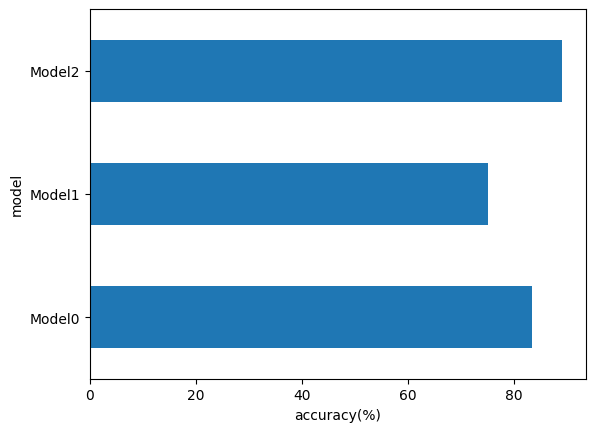

In [232]:
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy(%)")
plt.ylabel("model")

Evaluate Random preds

In [233]:
def make_predictions(model:torch.nn.Module,
                     data:list,
                     device:torch.device=device):
  pred_probs=[]
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample=torch.unsqueeze(sample,dim=0).to(device)
      pred_logit=model(sample)
      pred_prob=torch.softmax(pred_logit.squeeze(),dim=0)
      pred_probs.append(pred_prob.cpu())
  return torch.stack(pred_probs)


In [234]:
import random
# random.seed(42)
test_samples=[]
test_labels=[]
for sample,label in random.sample(list(test_data),k=9):
  test_samples.append(sample)
  test_labels.append(label)
test_samples[0].shape

torch.Size([1, 28, 28])

In [235]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [236]:
img,label=test_data[0][:10]
img.shape,label

(torch.Size([1, 28, 28]), 9)

In [237]:
import os
# Assume your models are model_1, model_2, model_3
models = [model_0, model_2, model_1]

# Define the save directory
save_dir = "folder/model"

os.makedirs(save_dir, exist_ok=True)

# Save models one by one
for idx, model in enumerate(models, start=1):
    save_path = os.path.join(save_dir, f"model_{idx}.pth")
    torch.save(model.state_dict(), save_path)
    print(f"✅ Saved model_{idx} to {save_path}")


✅ Saved model_1 to folder/model/model_1.pth
✅ Saved model_2 to folder/model/model_2.pth
✅ Saved model_3 to folder/model/model_3.pth


Text(0.5, 1.0, 'Ankle boot')

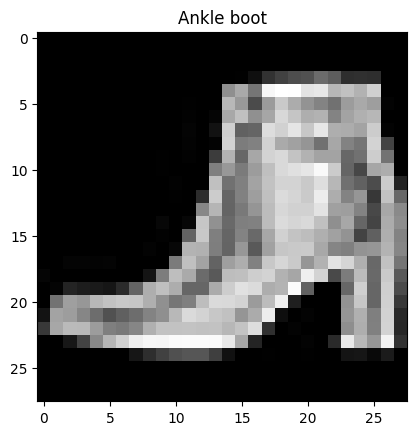

In [238]:
plt.imshow(test_samples[0].squeeze(),cmap='gray')
plt.title(class_names[test_labels[0]])

In [239]:
pred_probs=make_predictions(model=model_2,
                            data=test_samples)

pred_probs[:3]

tensor([[5.8893e-09, 1.1394e-09, 5.0628e-09, 7.0941e-09, 7.3481e-09, 3.0057e-05,
         5.4857e-07, 5.8219e-05, 5.2291e-06, 9.9991e-01],
        [1.9382e-05, 9.9997e-01, 9.7650e-09, 8.3105e-06, 1.5799e-06, 9.6477e-08,
         5.1324e-06, 3.1903e-08, 4.1957e-08, 1.0549e-08],
        [6.4375e-01, 3.0791e-03, 7.8922e-03, 7.2564e-02, 7.4922e-02, 1.1938e-05,
         1.9679e-01, 1.2106e-04, 8.1328e-04, 5.7430e-05]])

In [240]:
# test_labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([9, 1, 0, 5, 9, 2, 9, 3, 4])

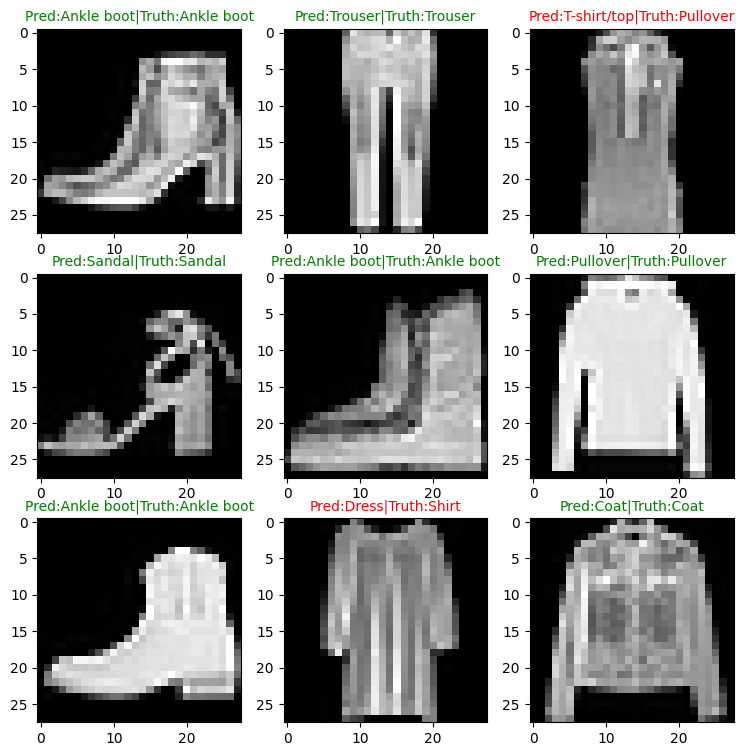

In [241]:
 plt.figure(figsize=(9,9))
 nrows=3
 ncols=3
 for i,sample in enumerate(test_samples):
  plt.subplot(nrows,ncols,i+1)
  plt.imshow(sample.squeeze(),cmap="gray")
  pred_label=class_names[pred_classes[i]]
  truth_label=class_names[test_labels[i]]
  title_text=f"Pred:{pred_label}|Truth:{truth_label}"
  if pred_label==truth_label:
    plt.title(title_text,fontsize=10,c="g")
  else:
    plt.title(title_text,fontsize=10,c="r")

Confusion Matrix

In [242]:
from tqdm.auto import tqdm
y_preds=[]
model_2.eval()
with torch.inference_mode():
  for X,y in tqdm(test_dataloader,desc="Making preedictions"):
    X,y = X.to(device),y.to(device)
    y_logit=model_2(X)
    y_pred=torch.softmax(y_logit.squeeze(),dim=0).argmax(dim=1)
    y_preds.append(y_pred.cpu())
# print(y_preds)
y_pred_tensor=torch.cat(y_preds)
y_pred_tensor[:10]

Making preedictions:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [243]:
import mlxtend
mlxtend.__version__

'0.23.4'

In [244]:
!pip install -q torchmetrics

In [245]:
try:
    import torchmetrics,mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend
    import torchmetrics,mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.23.4


In [246]:
print(mlxtend.__version__)

0.23.4


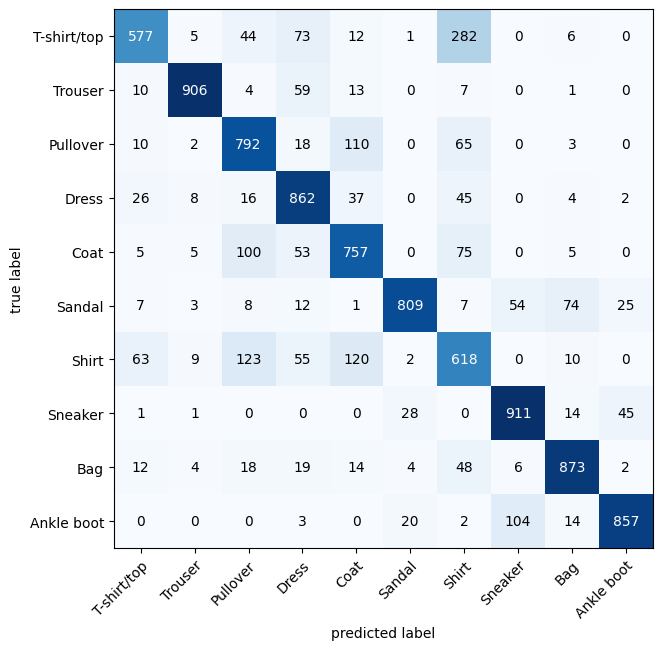

In [253]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat=ConfusionMatrix(task='multiclass',num_classes=len(class_names))
confmat_tensor=confmat(preds=y_pred_tensor,
                       target=test_data.targets)
fig,ax=plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10,7)
)

In [252]:
confmat_tensor

tensor([[577,   5,  44,  73,  12,   1, 282,   0,   6,   0],
        [ 10, 906,   4,  59,  13,   0,   7,   0,   1,   0],
        [ 10,   2, 792,  18, 110,   0,  65,   0,   3,   0],
        [ 26,   8,  16, 862,  37,   0,  45,   0,   4,   2],
        [  5,   5, 100,  53, 757,   0,  75,   0,   5,   0],
        [  7,   3,   8,  12,   1, 809,   7,  54,  74,  25],
        [ 63,   9, 123,  55, 120,   2, 618,   0,  10,   0],
        [  1,   1,   0,   0,   0,  28,   0, 911,  14,  45],
        [ 12,   4,  18,  19,  14,   4,  48,   6, 873,   2],
        [  0,   0,   0,   3,   0,  20,   2, 104,  14, 857]])

In [255]:
from pathlib import Path
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

MODEL_NAME="03_pytorch_computer_vision_model2.pth"

model_save_path=MODEL_PATH/MODEL_NAME
print(f"Saving model to:{model_save_path}")
torch.save(obj=model_2.state_dict(),f=model_save_path)

Saving model to:models/03_pytorch_computer_vision_model2.pth


In [257]:
torch.manual_seed(42)
loaded_model_2=Model2(
    input_shape=1,
    hidden_units=10,
    output_shape=len(class_names)
)
loaded_model_2.load_state_dict(torch.load(f=model_save_path))
loaded_model_2.to(device)

Model2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [258]:
model_2_results

{'model_name': 'Model2',
 'model_loss': 0.30448368191719055,
 'model_acc': 89.04752396166134}

In [260]:
torch.manual_seed(42)
loaded_model_2_results=eval_model(
   model=loaded_model_2,
   data_loader=test_dataloader ,
   loss_fn=loss_fn,
   accuracy_fn=accuracy_fn
)

In [263]:
model_2_results

{'model_name': 'Model2',
 'model_loss': 0.30448368191719055,
 'model_acc': 89.04752396166134}

In [264]:
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),atol=1e-02)

tensor(True)